# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [2]:
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import KFold,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
KNeighboursClassifier = KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

In [3]:
# Your code goes here
train_A = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv'))
valid_A = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv'))
print('Number of instances in train A: {}, number of attributes in train A: {}'.format(train_A.shape[0], train_A.shape[1]))
print('Number of instances in valid A: {}, number of attributes in valid A: {}'.format(valid_A.shape[0], valid_A.shape[1]))

Number of instances in train A: 2093, number of attributes in train A: 520
Number of instances in valid A: 1113, number of attributes in valid A: 520


### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

In [4]:
# Your code goes here
train_A.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

In [5]:
# Your code goes here
ls = list(train_A.iloc[:,1:501])
ls

['dim1',
 'dim2',
 'dim3',
 'dim4',
 'dim5',
 'dim6',
 'dim7',
 'dim8',
 'dim9',
 'dim10',
 'dim11',
 'dim12',
 'dim13',
 'dim14',
 'dim15',
 'dim16',
 'dim17',
 'dim18',
 'dim19',
 'dim20',
 'dim21',
 'dim22',
 'dim23',
 'dim24',
 'dim25',
 'dim26',
 'dim27',
 'dim28',
 'dim29',
 'dim30',
 'dim31',
 'dim32',
 'dim33',
 'dim34',
 'dim35',
 'dim36',
 'dim37',
 'dim38',
 'dim39',
 'dim40',
 'dim41',
 'dim42',
 'dim43',
 'dim44',
 'dim45',
 'dim46',
 'dim47',
 'dim48',
 'dim49',
 'dim50',
 'dim51',
 'dim52',
 'dim53',
 'dim54',
 'dim55',
 'dim56',
 'dim57',
 'dim58',
 'dim59',
 'dim60',
 'dim61',
 'dim62',
 'dim63',
 'dim64',
 'dim65',
 'dim66',
 'dim67',
 'dim68',
 'dim69',
 'dim70',
 'dim71',
 'dim72',
 'dim73',
 'dim74',
 'dim75',
 'dim76',
 'dim77',
 'dim78',
 'dim79',
 'dim80',
 'dim81',
 'dim82',
 'dim83',
 'dim84',
 'dim85',
 'dim86',
 'dim87',
 'dim88',
 'dim89',
 'dim90',
 'dim91',
 'dim92',
 'dim93',
 'dim94',
 'dim95',
 'dim96',
 'dim97',
 'dim98',
 'dim99',
 'dim100',
 'dim101

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

In [6]:
# Your code goes here
X_tr = train_A[ls]
X_tr = np.array(X_tr)  # convert pd to array        
X_val = valid_A[ls]
X_val = np.array(X_val)

y_tr = train_A['is_person'] #target vector
y_val = valid_A['is_person']
y_tr = np.array(y_tr)
y_val = np.array(y_val)
# print(type(X_tr))
print('The shape of training features is:',np.shape(X_tr))
print('The shape of validation features is:',np.shape(X_val))
print('The shape of training target is:',np.shape(y_tr))
print('The shape of validation target is:',np.shape(y_val))

The shape of training features is: (2093, 500)
The shape of validation features is: (1113, 500)
The shape of training target is: (2093,)
The shape of validation target is: (1113,)


In [7]:
type(train_A[ls])

pandas.core.frame.DataFrame

### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

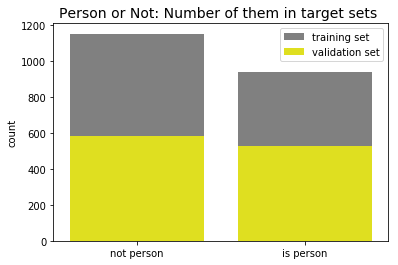

In [8]:
# Your code goes here
f1 = sns.countplot(x = y_tr,color = 'grey',label = 'training set')
f2 = sns.countplot(x = y_val,color = 'yellow',label = 'validation set')
fig = plt.legend()

labels = ['not person','is person']
f1.set_xticklabels(labels)

plt.title('Person or Not: Number of them in target sets ',size = 14)
plt.show()


### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

### *Your answer goes here*
DummyClassifier is a classifier that makes predictions using simple rules,and it is useful as a simple baseline to compare with other (real) classifiers.

In [9]:
# Your code goes here
dummy_classifier = DummyClassifier().fit(X_tr, y_tr)
acc = dummy_classifier.score(X_val,y_val)
print("The accuracy baseline classification achieves is:",acc)

The accuracy baseline classification achieves is: 0.536388140162


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

In [10]:
# Your code goes here
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
print('LogisticRegression classification accuracy on training set is: {:.3f}'.format(lr.score(X_tr, y_tr)))
print('LogisticRegression classification accuracy on test set is: {:.3f}'.format(lr.score(X_val, y_val)))

LogisticRegression classification accuracy on training set is: 0.551
LogisticRegression classification accuracy on test set is: 0.527


### *Your answer goes here*
The classifier generalises well on unseen data since the classification accuracy on the validation set is comparable to the training classification.

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations across the columns of your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [11]:
# Your code goes here
print('The means of the first 5 features in training set are:\n',X_tr[:,0:5].mean(axis=0))
print('The stardard deviations of the first 5 features in training set are:\n',X_tr[:,0:5].std(axis=0))

The means of the first 5 features in training set are:
 [ 0.00175058  0.00075592  0.00431695  0.00185278  0.00227248]
The stardard deviations of the first 5 features in training set are:
 [ 0.00119281  0.00140604  0.00369255  0.00134017  0.00159773]


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

In [12]:
# Your code goes here
scaler = StandardScaler(with_mean=True, with_std=True).fit(X_tr) 
# create a StandardScaler object and fit it use training features data
X_tr_scaler = scaler.transform(X_tr)    # transform training features
X_val_scaler = scaler.transform(X_val)  # transform validation features

print('The means of the first 5 attributes in training features are:\n',X_tr_scaler[:,0:5].mean(axis=0))
print('The stardard deviations of the first 5 attributes in training features are:\n',X_tr_scaler[:,0:5].std(axis=0))
print('The means of the first 5 attributes in validation features are:\n',X_val_scaler[:,0:5].mean(axis=0))
print('The stardard deviations of the first 5 validation in training features are:\n',X_val_scaler[:,0:5].std(axis=0))

The means of the first 5 attributes in training features are:
 [ -3.39485301e-17  -2.20665446e-17   2.44429417e-16   1.42583827e-16
  -5.77125012e-17]
The stardard deviations of the first 5 attributes in training features are:
 [ 1.  1.  1.  1.  1.]
The means of the first 5 attributes in validation features are:
 [-0.00550612 -0.0382933   0.10915098  0.09369314  0.03057844]
The stardard deviations of the first 5 validation in training features are:
 [ 1.01310886  0.96981949  1.0492285   1.05684479  0.97471336]


**Your answer goes here**

This is indeed what I ecpected. 

After standardisation, the training features got a perfect format which have zero mean and unit standard deviation because. This because training features are used to fit the StandardScaler object. As for validaion features, though with tiny error, its means are very close to 0 and standard deviation very close to 1 so the results are still what I expected. 

Validation set is used to test the performance of model built based on training data, so we don't use it to standardise the data. 

### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [13]:
# Your code goes here
lr_new = LogisticRegression(solver='lbfgs').fit(X_tr_scaler, y_tr)

print('After standardisation, LogisticRegression classification accuracy on training set is: {:.3f}'.format(lr.score(X_tr_scaler, y_tr)))
print('After standardisation, LogisticRegression classification accuracy on test set is: {:.3f}'.format(lr.score(X_val_scaler, y_val)))
# baseline - The accuracy it achieves is: 0.506738544474

After standardisation, LogisticRegression classification accuracy on training set is: 0.651
After standardisation, LogisticRegression classification accuracy on test set is: 0.650


**Your answer goes here**

The classification accuracy of this model improves compared to baseline classifier.

### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

In [14]:
X_tr

array([[ 0.002232,  0.000558,  0.00279 , ...,  0.001953,  0.001674,
         0.000558],
       [ 0.001563,  0.000391,  0.007422, ...,  0.      ,  0.003125,
         0.004687],
       [ 0.000521,  0.      ,  0.      , ...,  0.000521,  0.003646,  0.      ],
       ..., 
       [ 0.002378,  0.00034 ,  0.012228, ...,  0.000679,  0.003736,
         0.002038],
       [ 0.005952,  0.000744,  0.002232, ...,  0.004464,  0.003348,
         0.00558 ],
       [ 0.000679,  0.      ,  0.002717, ...,  0.001359,  0.000679,
         0.006114]])

In [15]:
X_tr_scaler

array([[ 0.4036037 , -0.14076645, -0.4135209 , ..., -0.15512767,
        -0.40608637, -0.8753979 ],
       [-0.15725699, -0.25954013,  0.84089569, ..., -1.53238482,
         0.32063313,  0.61849034],
       [-1.03082475, -0.53762702, -1.16909566, ..., -1.16497521,
         0.581571  , -1.07728446],
       ..., 
       [ 0.52600379, -0.29581233,  2.14243414, ..., -1.05355348,
         0.62664664, -0.33992815],
       [ 3.52229093, -0.00847959, -0.56463585, ...,  1.61563154,
         0.43232055,  0.94158121],
       [-0.89836438, -0.53762702, -0.43329042, ..., -0.57401694,
        -0.90442261,  1.13478449]])

In [16]:
# Your code goes here
kf = KFold(2093,n_folds=3, shuffle=True,random_state=0)
i = 1
for train_index, test_index in kf:
    print("The number of test samples for fold",i, "is:", len(test_index))
    i=i+1
    #print(test_index)

The number of test samples for fold 1 is: 698
The number of test samples for fold 2 is: 698
The number of test samples for fold 3 is: 697


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [17]:
# Your code goes here
C_value = np.logspace(-5, 5, num=20) # compute C value usng logspace() function 

score_array = []
for value in C_value:
    for train_index, test_index in kf:
        
        lr_cyc = LogisticRegression(solver='lbfgs', C = value).fit(X_tr_scaler[train_index], y_tr[train_index])
        score = lr_cyc.score(X_tr_scaler[test_index], y_tr[test_index])
        # compute the classifiction accuracy of each CV fold for every C value
        sv = [score,value]
        score_array.append(sv) # store accuracy and C value
        
score_array = np.array(score_array)
score_array

array([[  5.73065903e-01,   1.00000000e-05],
       [  5.45845272e-01,   1.00000000e-05],
       [  5.48063128e-01,   1.00000000e-05],
       [  6.28939828e-01,   3.35981829e-05],
       [  6.31805158e-01,   3.35981829e-05],
       [  6.35581062e-01,   3.35981829e-05],
       [  6.67621777e-01,   1.12883789e-04],
       [  6.94842407e-01,   1.12883789e-04],
       [  6.42754663e-01,   1.12883789e-04],
       [  6.71919771e-01,   3.79269019e-04],
       [  7.19197708e-01,   3.79269019e-04],
       [  6.55667145e-01,   3.79269019e-04],
       [  6.87679083e-01,   1.27427499e-03],
       [  7.29226361e-01,   1.27427499e-03],
       [  6.80057389e-01,   1.27427499e-03],
       [  6.96275072e-01,   4.28133240e-03],
       [  7.34957020e-01,   4.28133240e-03],
       [  7.00143472e-01,   4.28133240e-03],
       [  6.74785100e-01,   1.43844989e-02],
       [  7.02005731e-01,   1.43844989e-02],
       [  6.81492109e-01,   1.43844989e-02],
       [  6.70487106e-01,   4.83293024e-02],
       [  

### ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

[[  5.55658101e-01   1.00000000e-05]
 [  6.32108682e-01   3.35981829e-05]
 [  6.68406282e-01   1.12883789e-04]
 [  6.82261541e-01   3.79269019e-04]
 [  6.98987611e-01   1.27427499e-03]
 [  7.10458521e-01   4.28133240e-03]
 [  6.86094313e-01   1.43844989e-02]
 [  6.71762185e-01   4.83293024e-02]
 [  6.56954556e-01   1.62377674e-01]
 [  6.46439441e-01   5.45559478e-01]
 [  6.41180856e-01   1.83298071e+00]
 [  6.37356990e-01   6.15848211e+00]
 [  6.33058311e-01   2.06913808e+01]
 [  6.32580756e-01   6.95192796e+01]
 [  6.32580756e-01   2.33572147e+02]
 [  6.33058311e-01   7.84759970e+02]
 [  6.32103201e-01   2.63665090e+03]
 [  6.32103201e-01   8.85866790e+03]
 [  6.33535866e-01   2.97635144e+04]
 [  6.33058311e-01   1.00000000e+05]]


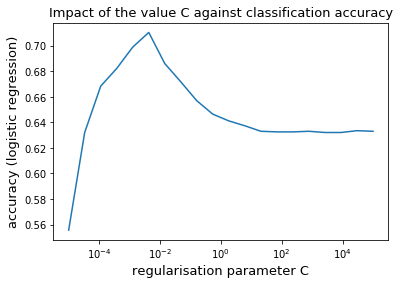

In [18]:
# Your code goes here
mscore=[]
#new_score_array = []
numbers = range(0,59)
for i in numbers[::3]:
    mean_score= score_array[i:i+3,0].mean(axis=0)
    mscore.append(mean_score)
    
new_score_array = np.vstack((mscore, C_value)).T

plt.plot(C_value, mscore)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.title('Impact of the value C against classification accuracy',size = 13)
plt.ylabel('accuracy (logistic regression)',size = 13)
plt.xlabel('regularisation parameter C',size = 13)

print(new_score_array)

### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [19]:
# Your code goes here
best_acc = np.amax(mscore)
for score_value, c_value in new_score_array:
    if score_value == best_acc:
        op_C = c_value
new_lr = LogisticRegression(solver='lbfgs', C = op_C).fit(X_tr_scaler, y_tr)
score_val = new_lr.score(X_val_scaler,y_val)
print('The  classification accuracy on the validation set is',score_val, '\nwith optimal C value',op_C)

The  classification accuracy on the validation set is 0.696316262354 
with optimal C value 0.00428133239872


### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

In [20]:
# Your code goes here
lrCV = LogisticRegressionCV(Cs=C_value, cv=kf, solver='lbfgs').fit(X_tr_scaler,y_tr)
lrCV_acc = lrCV.score(X_val_scaler,y_val)
print('Using LogisticRegressionCV model, the classification accuracy on the validation set is',score_val, 
      '\nwith optimal C value',op_C)

Using LogisticRegressionCV model, the classification accuracy on the validation set is 0.696316262354 
with optimal C value 0.00428133239872


### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to Lab_3 if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [21]:
# Your code goes here
rf = RandomForestClassifier(n_estimators = 500, random_state=42).fit(X_tr_scaler,y_tr)
# Initialise a random forest classifier and fit the model by using training data
train_score = rf.score(X_tr_scaler,y_tr)     # compute the accuracy of training set
valid_score = rf.score(X_val_scaler,y_val)   # compute the accuracy of validation set 
print('The accuracy score on training sets is {0}, \nThe accuracy score on validation sets is {1}'
      .format(train_score,valid_score))

The accuracy score on training sets is 1.0, 
The accuracy score on validation sets is 0.692722371967655


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

**Your answer goes here**

The result (accuracy score) on training sets is not meaningful. The random forest classifier will fit a number of decision tree classifiers on various sub-samples of the dataset. If we test the classifier on the training set, then each input will be classified correctly since the sample decision trees classified in the training set is the sample itself.

The performance on unseen data is expected to be much lower, and this is why training and validation accuracies are discrepant. Not surprising indeed. 

### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [224]:
train_list_new = train_A.columns[1:501]
feature_impor = rf.feature_importances_
important_names = pd.DataFrame({'feature names': train_list_new,'importance_score': feature_impor})
important_names.sort_values(by=['importance_score'],ascending =False).head(50)

,feature names,importance_score
20,dim21,0.007572
50,dim51,0.007559
359,dim360,0.007032
3,dim4,0.006193
478,dim479,0.006054
75,dim76,0.006026
282,dim283,0.005811
460,dim461,0.005606
342,dim343,0.005451
397,dim398,0.004859


### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [24]:
# Your code goes here
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr_scaler,y_tr)

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr_scaler,y_tr)

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr_scaler,y_tr)

print('Linear SVC classification accuracy on training set: {:.3f}'.format(svc_linear.score(X_tr_scaler,y_tr)))
print('Linear SVC classification accuracy on validation set: {:.3f}'.format(svc_linear.score(X_val_scaler, y_val)))
print('RBF SVC classification accuracy on training set: {:.3f}'.format(svc_rbf.score(X_tr_scaler,y_tr)))
print('RBF SVC classification accuracy on validation set: {:.3f}'.format(svc_rbf.score(X_val_scaler, y_val)))
print('Poly SVC classification accuracy on training set: {:.3f}'.format(svc_poly.score(X_tr_scaler,y_tr)))
print('Poly SVC classification accuracy on validatin set: {:.3f}'.format(svc_poly.score(X_val_scaler, y_val)))

Linear SVC classification accuracy on training set: 0.842
Linear SVC classification accuracy on validation set: 0.639
RBF SVC classification accuracy on training set: 0.911
RBF SVC classification accuracy on validation set: 0.730
Poly SVC classification accuracy on training set: 0.991
Poly SVC classification accuracy on validatin set: 0.702


### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [25]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

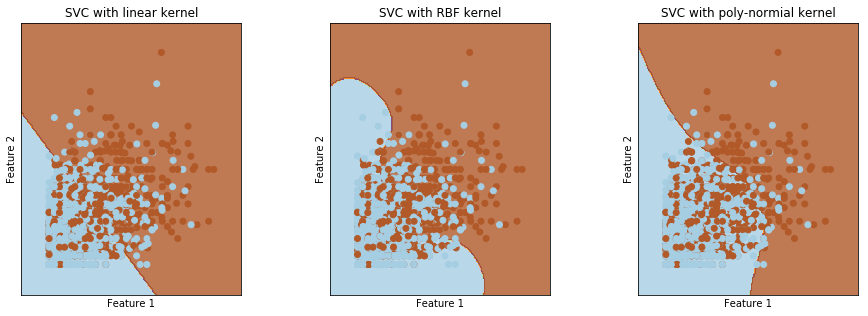

In [26]:
# Your code goes here
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with poly-normial kernel',]

train_feat = np.array(X_tr_scaler[:,[20,75]])
# an array contain the 21th and 76th columns of training features
svc_linear = SVC(kernel='linear').fit(train_feat,y_tr) # linear SVC
svc_rbf = SVC(kernel='rbf').fit(train_feat,y_tr)       # RBF SVC
svc_poly = SVC(kernel='poly').fit(train_feat,y_tr)     # polynomial SVC
ls_clfs = [svc_linear,svc_rbf,svc_poly] # classifiers trained 

show_svc_decision_boundaries(clfs = ls_clfs, X = train_feat, title=titles)


***Your answer goes here***

The decision boundaries depend on the kind of kernel and its parameters, while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible decision boundaries. Theoretically, the more clearly boundaries seperate data, the higher accuracy score it should be. 

### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

The  classification accuracy on the validation set is 0.727762803235 
with optimal parameter C  1.6681005372


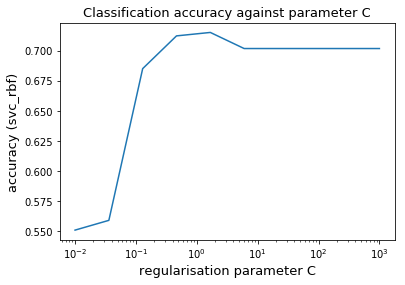

In [30]:
# Your code goes here
C_values = np.logspace(-2,3,10) # create a list of the values of parameter C
acc_array = []
# for each fold and each parameter C, compute and store the classification accuracy in acc_array
for number in C_values:
    for train_index, test_index in kf:
        svc_RBF = c(kernel='rbf', gamma="auto", C = number).fit(X_tr_scaler[train_index],y_tr[train_index]) 
        # initialize SVM classifier with RBF kernel, use train_index to fit the classifier
        accuracy = svc_RBF.score(X_tr_scaler[test_index],y_tr[test_index]) # compute the classification accuracy
        ACC_and_C = [accuracy,number] # store the accuracy and its corresponding parameter C
        acc_array.append(ACC_and_C) 
acc_array = np.array(acc_array)

# store the mean accuracy and its corresponding parameter C in a new array (new_acc_array)
macc=[]
numbers = range(0,29)
for i in numbers[::3]:
    mean_acc= acc_array[i:i+3,0].mean(axis=0) # calculate the mean accuracy cross 3 folds
    macc.append(mean_acc)
new_acc_array = np.vstack((macc, C_values)).T

# Plot the mean cross-validated classification accuracy against the regularisation parameter C
plt.plot(C_values, macc)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.title('Classification accuracy against parameter C',size = 13)
plt.ylabel('accuracy (svc_rbf)',size = 13)
plt.xlabel('regularisation parameter C',size = 13)

# according to highest accuracy, find the optimal value of C parameter
op_acc = np.amax(macc) # get highest value of accuracy
for acc, c in new_acc_array:
    if acc == op_acc:
        C_optimal = c
        
# use the optimal C to train a new classifier and compute the classification accuracy on validation set
new_svc_RBF = SVC(kernel='rbf', gamma="auto", C = C_optimal).fit(X_tr_scaler,y_tr)
acc_val = new_svc_RBF.score(X_val_scaler,y_val)
print('The  classification accuracy on the validation set is',acc_val, '\nwith optimal parameter C ',C_optimal)

### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

The  classification accuracy on the validation set is 0.726864330638 
with optimal parameter gamma  0.0016681005372


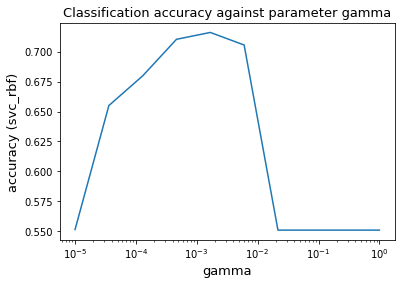

In [39]:
# Your code goes here
gamma_value = np.logspace(-5,0,10) # create a list of the values of parameter gamma
gamma_acc_array = []
# for each fold and each value of parameter gamma, 
# compute and store the classification accuracy in gamma_acc_array
for value in gamma_value:
    for train_index, test_index in kf:
        svc_rbf_gamma = SVC(kernel='rbf', gamma=value, C = 1.0).fit(X_tr_scaler[train_index],y_tr[train_index]) 
        # initialize SVM classifier with RBF kernel, use train_index to fit the classifier
        gamma_acc = svc_rbf_gamma.score(X_tr_scaler[test_index],y_tr[test_index]) 
        # compute the classification accuracy
        gamma_acc_array_in = [gamma_acc,value] 
        # store the accuracy and its corresponding parameter C
        gamma_acc_array.append(gamma_acc_array_in) 
gamma_acc_array = np.array(gamma_acc_array)

# store the mean accuracy and its corresponding parameter gamma in a new array (maccuracy)
maccuracy=[]
numbers = range(0,29)
for i in numbers[::3]:
    acc_mean= gamma_acc_array[i:i+3,0].mean(axis=0) # calculate the mean accuracy cross 3 folds
    maccuracy.append(acc_mean)
macc_gamma = np.vstack((maccuracy, gamma_value)).T

# Plot the mean cross-validated classification accuracy against the regularisation parameter gamma
plt.plot(gamma_value, maccuracy)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.title('Classification accuracy against parameter gamma',size = 13)
plt.ylabel('accuracy (svc_rbf)',size = 13)
plt.xlabel('gamma',size = 13)

# according to highest accuracy, find the optimal value of gamma parameter
highest_acc = np.amax(maccuracy) # get highest value of accuracy
for accu, gamma in macc_gamma:
    if accu == highest_acc:
        gamma_optimal = gamma
        
# use the optimal gamma to train a new classifier and compute the classification accuracy on validation set
new_svc_rbf_gamma = SVC(kernel='rbf', gamma=gamma_optimal, C = 1.0).fit(X_tr_scaler,y_tr)
acc_gamma_val = new_svc_rbf_gamma.score(X_val_scaler,y_val)
print('The  classification accuracy on the validation set is',acc_gamma_val, 
      '\nwith optimal parameter gamma ',gamma_optimal)

### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

In [80]:
# Your code goes here
C_range = np.logspace(-2, 1, 4)      # list of the values of parameter C
gamma_range = np.logspace(-4, -1, 4) # list of the values of parameter gamma

score_store = []
# use cross-validation that contain 3 folds
# for each value of paramenter C and gamma
# compute and store the classification accuracy in array score_store
for c in C_range:
    for g in gamma_range:
        for train_index, test_index in kf:
            svc_rbf_3 = SVC(kernel='rbf', gamma=g, C = c).fit(X_tr_scaler[train_index],y_tr[train_index]) 
            # initialize SVM classifier with RBF kernel, use train_index to fit the classifier
            clf_acc = svc_rbf_3.score(X_tr_scaler[test_index],y_tr[test_index]) 
            # compute the classification accuracy
            score_store_in = [clf_acc,c,g] 
            # store the accuracy and its corresponding parameter C and gamma
            score_store.append(score_store_in) 
score_store = np.array(score_store)

#######################   separate the code to several kernals ...   ##########################
###################    so that it is easier to debug and ... ######################
###################   reduce computational time if the following code need to be restart ###############

In [160]:
###################  code continues...#####################
mscore_store=[]
numbers = range(0,47)
for i in numbers[::3]:
    score_mean= score_store[i:i+3,0].mean(axis=0) # calculate the mean accuracy cross 3 folds
    mscore_store.append(score_mean) 
# compute and store the mean value of classification accuracy

new_mscore_store = []
for j in range(0,np.shape(mscore_store)[0],4):
    new_mscore = mscore_store[j:j+4]
    new_mscore_store.append(new_mscore)
np.shape(new_mscore_store)  
# reshape the list of classification accuracy from (16,) to (4,4)
# so that the acuracy can reflect the impact from both C and gamma

df = pd.DataFrame(new_mscore_store, index=C_range, columns=gamma_range)


the optimal pair of C and gamma is: (1.0, 0.001) ,with this C-gamma pair
the classification accuracy on the training set is 0.834687052078
the classification accuracy on the validation set is 0.721473495058


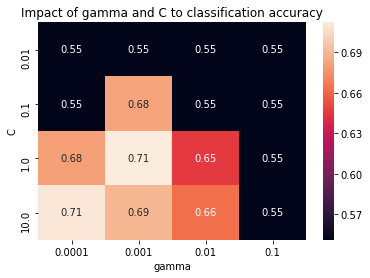

In [192]:
###################  code continues...#####################
g1 = sns.heatmap(df,annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.title('Impact of gamma and C to classification accuracy')
# visualise the mean cross-validated classification accuracy for all C-gamma pairs

for k in C_range:
    for b in gamma_range:
        if df.get_value(k,b) == df.values.max():
            c_opti = k
            gamma_opti = b

svc_rbf_pair = SVC(kernel='rbf', gamma=gamma_opti, C = c_opti).fit(X_tr_scaler,y_tr) 
            # initialize SVM classifier with RBF kernel, use train_index to fit the classifier
clf_acc_tr = svc_rbf_pair.score(X_tr_scaler,y_tr) 
clf_acc_val = svc_rbf_pair.score(X_val_scaler,y_val)      

print('the optimal pair of C and gamma is:',(c_opti,gamma_opti),',with this C-gamma pair')
print('the classification accuracy on the training set is',clf_acc_tr)
print('the classification accuracy on the validation set is',clf_acc_val)               


### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

***Your answer goes here***

In contrast, the classification accuracy on the validation set is slightly lower than in previous questions. 
This because ...

Since there are 500 features of the data, which is a relatively high dimension, maybe remove some unimportant features (reduce noise) helps to improve the performance. It depends on the method to reduce the number of features, sometimes it is possible to delete some important features that seems like 'irrelavant'. 

### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [193]:
np.arange(1,8)

array([1, 2, 3, 4, 5, 6, 7])

The  classification accuracy on the validation set is 0.689128481581 
with optimal parameter degree  1.0


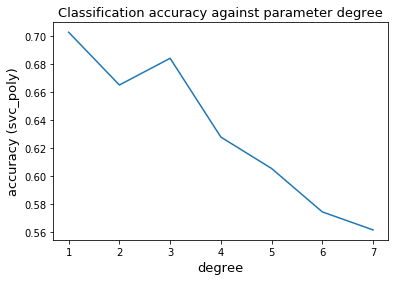

In [197]:
# Your code goes 
degree_range = np.arange(1,8) # list of the values of parameter degree
degree_acc_array = []
# for each fold and each value of parameter gamma, 
# compute and store the classification accuracy in gamma_acc_array
for d in degree_range:
    for train_index, test_index in kf:
        svc_poly_degree = SVC(kernel='poly', degree=d).fit(X_tr_scaler[train_index],y_tr[train_index]) 
        # initialize SVM classifier with RBF kernel, use train_index to fit the classifier
        degree_acc = svc_poly_degree.score(X_tr_scaler[test_index],y_tr[test_index]) 
        # compute the classification accuracy
        degree_acc_array_in = [degree_acc,d] 
        # store the accuracy and its corresponding parameter degree
        degree_acc_array.append(degree_acc_array_in) 
degree_acc_array = np.array(degree_acc_array)

# store the mean accuracy and its corresponding parameter degree in a new array (macc2)
macc2=[]
numbers = range(0,20)
for i in numbers[::3]:
    acc_mean2= degree_acc_array[i:i+3,0].mean(axis=0) # calculate the mean accuracy cross 3 folds
    macc2.append(acc_mean2)
macc_degree = np.vstack((macc2, degree_range)).T

# Plot the mean cross-validated classification accuracy against the parameter degree
plt.plot(degree_range, macc2)
plt.title('Classification accuracy against parameter degree',size = 13)
plt.ylabel('accuracy (svc_poly)',size = 13)
plt.xlabel('degree',size = 13)

# according to highest accuracy, find the optimal value of gamma parameter
opti_acc = np.amax(macc2) # get highest value of accuracy
for m,n in macc_degree:
    if m == opti_acc:
        degree_optimal = n
        
# use the optimal gamma to train a new classifier and compute the classification accuracy on validation set
new_svc_rbf_degree = SVC(kernel='poly', degree=degree_optimal).fit(X_tr_scaler,y_tr)
acc_degree_val = new_svc_rbf_degree.score(X_val_scaler,y_val)
print('The  classification accuracy on the validation set is',acc_degree_val, 
      '\nwith optimal parameter degree ',degree_optimal)

### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

***Your answer goes here***
I think it is a better idea to use cross-validation rather than hold-out validation. 

1. cross-validation:
    * advantage: use data more effeciently
    * disadvantage: too expensive
1. hold-out validation:
    * advantage: much simpler to implement so not very expensive 
    * disadvantaage: performance not good enough
     
I certainly prefer cross-validation, but in practice, training a cross-validation model is too costly hence I have to choose hold-out validation.


### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [223]:
# Your code goes here
ls2 = list(train_A.iloc[:,1:520])
X2_tr = train_A[ls2].drop('is_person',axis=1)
X2_tr = np.array(X2_tr)  # convert pd to array        
X2_val = valid_A[ls2].drop('is_person',axis =1)
X2_val = np.array(X2_val)

#X = spambase_binary.drop('is_spam', axis=1)

y2_tr = train_A['is_person'] #target vector
y2_val = valid_A['is_person']
y2_tr = np.array(y2_tr)
y2_val = np.array(y2_val)
# print(type(X_tr))
print('The shape of training features is:',np.shape(X2_tr))
print('The shape of validation features is:',np.shape(X2_val))
print('The shape of training target is:',np.shape(y2_tr))
print('The shape of validation target is:',np.shape(y2_val))

scaler2 = StandardScaler(with_mean=True, with_std=True).fit(X2_tr) 
# create a StandardScaler object and fit it use training features data
X2_tr_scaler = scaler2.transform(X2_tr)    # transform training features
X2_val_scaler = scaler2.transform(X2_val)  # transform validation features

rf2 = RandomForestClassifier(n_estimators = 500, random_state=31).fit(X2_tr_scaler,y2_tr)
# Initialise a random forest classifier and fit the model by using training data
train_score2 = rf2.score(X2_tr_scaler,y2_tr)     # compute the accuracy of training set
valid_score2 = rf2.score(X2_val_scaler,y2_val)   # compute the accuracy of validation set 
print('\nUsing RandomForest model,\nThe accuracy score on training sets is {0}, \nThe accuracy score on validation sets is {1}'
      .format(train_score2,valid_score2))

train_list_new2 = train_A.columns[1:520].drop('is_person')
feature_impor2 = rf2.feature_importances_
important_names2 = pd.DataFrame({'feature names': train_list_new2,'importance_score': feature_impor2})
print('\nThe 50 most important features is shown as below:')
important_names2.sort_values(by=['importance_score'],ascending =False).head(50)

The shape of training features is: (2093, 518)
The shape of validation features is: (1113, 518)
The shape of training target is: (2093,)
The shape of validation target is: (1113,)

Using RandomForest model,
The accuracy score on training sets is 1.0, 
The accuracy score on validation sets is 0.7196765498652291

The 50 most important features is shown as below:


,feature names,importance_score
507,is_cat,0.008605
502,is_bird,0.008318
20,dim21,0.007989
50,dim51,0.007203
359,dim360,0.006534
75,dim76,0.006491
478,dim479,0.005844
3,dim4,0.005513
397,dim398,0.005442
460,dim461,0.005089


***Your answer goes here***
1. What do you notice by looking at the list of the best 50 features?
    * The 2 most important features changed from 'dim21' and 'dim51' to 'is_cat' and 'is_bird', this may imply that there is a change when the person usually occurs together with a cat or dog in a picture. 
    * In addition to the 2 most important features changed, the rest of 50 important features' name are nearly the same in Question1.18 and here，which looks like push 2 places behind. 
1. How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
    * The performance improved as the accuaracy is higher now. By adding two more important features than all others, the model now can catch the features of 'person' more precisely, so it performs better than before. 
1. Would it be easy to make use of the results in practice? Briey explain your reasoning.
    * Unfortunately no. One reason is that the pictures in real world is more complicated and not clear enough. There are millions of different objects so indicator variables of 20 is not enough.

## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see Lab 4). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/0.17/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

*Your answer goes here (max. 600 words)*



In [ ]:
# Your code goes here

In [ ]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(test_images_partB_pred_proba) 

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)